In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import copy
import networkx as nx

#### Load data

In [2]:
FlightsNx = pd.read_pickle("FlightsNx.pkl")

#### Implement as network. 


In [3]:
Network = nx.from_pandas_edgelist(FlightsNx, source = "Origin", target = "Dest", edge_attr = True)
print(nx.info(Network))

Name: 
Type: Graph
Number of nodes: 310
Number of edges: 2868
Average degree:  18.5032


In [4]:
degree_dict = nx.algorithms.centrality.degree_centrality(Network) 
degree_values = list(degree_dict.values())
# Create dataframe
degrees = pd.DataFrame(degree_values)
degrees.columns = ["degree"]
degrees["degree_unnormalized"] = degrees["degree"]*(len(Network.nodes)-1)
degrees["airport"] = degree_dict.keys()

## Attacks and Errors
### Analysis of how removing certain airports affect network characteristics

#### Measures for entire network

In [5]:
print(nx.info(Network))
print("The average shortest path is: {}".format(nx.average_shortest_path_length(Network)))
print("The average clustering coefficient is: {}".format(nx.average_clustering(Network)))
print("The diameter of the network is: {}".format(nx.diameter(Network)))
print("The global efficiency of the network is: {}".format(nx.global_efficiency(Network)))

Name: 
Type: Graph
Number of nodes: 310
Number of edges: 2868
Average degree:  18.5032
The average shortest path is: 2.3133312454327175
The average clustering coefficient is: 0.6329597748621263
The diameter of the network is: 5
The global efficiency of the network is: 0.46953265824570517


In [6]:
degrees.sort_values(by = "degree_unnormalized", inplace = True, ascending = False)
average_clustering = list()
average_shortest_path_length = list()
global_efficiency = list()
average_degree = list()
for i in range(30):
    net = Network.subgraph(nodes = list(degrees["airport"])[i:])
    average_clustering.append(nx.average_clustering(net))
    
    #average_shortest_path_length.append(nx.average_shortest_path_length(net))
    
    global_efficiency.append(nx.global_efficiency(net))
    
    average_degree.append(sum(dict(net.degree()).values())/len(dict(net.degree()).values()))
    if i%5 == 0:
        print(i)
    
measures_attacks = pd.DataFrame({"average_degree":average_degree,
                                "average_clustering":average_clustering,
                                "global_efficiency":global_efficiency})
#measures_attacks.head()

0
5
10
15
20
25


In [7]:
measures_attacks.to_pickle("measures_attacks.pkl")

In [8]:
degrees.sort_values(by = "degree_unnormalized", inplace = True, ascending = False)
average_clustering = list()
average_shortest_path_length = list()
global_efficiency = list()
average_degree = list()
for i in range(30):
    net = Network.subgraph(nodes = list(degrees["airport"])[:len(degrees["airport"])-i])
    average_clustering.append(nx.average_clustering(net))
    
    #average_shortest_path_length.append(nx.average_shortest_path_length(net))
    
    global_efficiency.append(nx.global_efficiency(net))
    
    average_degree.append(sum(dict(net.degree()).values())/len(dict(net.degree()).values()))
    if i%5 == 0:
        print(i)
    
measures_errors = pd.DataFrame({"average_degree":average_degree,
                                "average_clustering":average_clustering,
                                "global_efficiency":global_efficiency})
measures_errors.head()

0
5
10
15
20
25


,average_degree,average_clustering,global_efficiency
0,18.503226,0.632960,0.469533
1,18.556634,0.635013,0.469762
2,18.610390,0.637079,0.469995
3,18.664495,0.639165,0.470416
4,18.718954,0.641258,0.470655


In [9]:
measures_errors.to_pickle("measures_errors.pkl")

#### Mapping airport network geographically

In [10]:
attack_effect = pd.read_pickle("measures_attacks.pkl")
error_effect = pd.read_pickle("measures_errors.pkl")
plist = list(range(1,31))
plist = [x * 1/310 for x in plist]

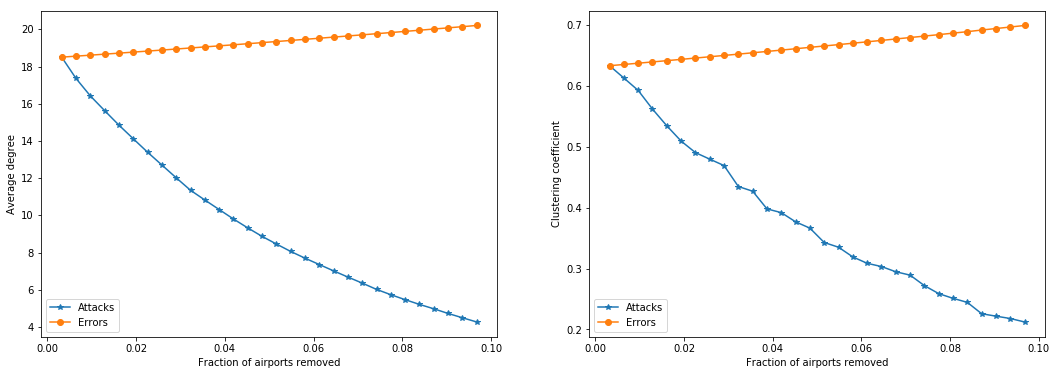

In [11]:
fig, ax = plt.subplots(figsize = (18,6))
plt.subplot(1,2,1)
plt.plot(plist, attack_effect["average_degree"], label = "Attacks", marker = "*")
plt.plot(plist, error_effect["average_degree"], label = "Errors", marker = "o")
#plt.title("Effect of attacks and errors on network average degree")
plt.legend(loc = "lower left")
plt.xlabel("Fraction of airports removed")
plt.ylabel("Average degree")

plt.subplot(1,2,2)
plt.plot(plist, attack_effect["average_clustering"], label = "Attacks", marker = "*")
plt.plot(plist, error_effect["average_clustering"], label = "Errors", marker = "o")
#plt.title("Effect of attacks and errors on network clustering coefficient")
plt.legend(loc = "lower left")
plt.xlabel("Fraction of airports removed")
plt.ylabel("Clustering coefficient")
plt.savefig(fname = "Figures/attacksanderrors.png", format = "png", bbox_inches = "tight")

plt.show()